# Travel Trends from Mobi Data

This analysis follows Jake VanderPlas's blog post: http://jakevdp.github.io/blog/2015/07/23/learning-seattles-work-habits-from-bicycle-counts/

In [1]:
%matplotlib notebook

In [2]:
#Load mobi daily data
data = pd.read_pickle('taken_hourly_df.p')
#data = data['2017-06':'2017-09']
data = pd.DataFrame(data.sum(1))
data.loc['2017-06-24'] = np.nan
data.loc['2017-06-25'] = np.nan

In [3]:
data.tail()

,0
time,
2017-11-03 12:00:00-07:00,56.0
2017-11-03 13:00:00-07:00,74.0
2017-11-03 14:00:00-07:00,95.0
2017-11-03 15:00:00-07:00,69.0
2017-11-03 16:00:00-07:00,129.0


In [4]:
data['2017-06-29']

,0
time,
2017-06-29 00:00:00-07:00,18.0
2017-06-29 01:00:00-07:00,15.0
2017-06-29 02:00:00-07:00,3.0
2017-06-29 03:00:00-07:00,0.0
2017-06-29 04:00:00-07:00,3.0
2017-06-29 05:00:00-07:00,10.0
2017-06-29 06:00:00-07:00,34.0
2017-06-29 07:00:00-07:00,92.0
2017-06-29 08:00:00-07:00,201.0


<IPython.core.display.Javascript object>


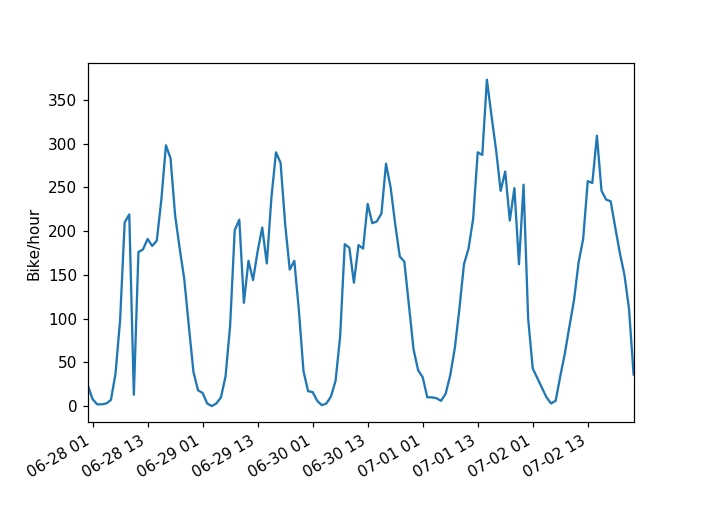

In [5]:
f,ax = plt.subplots()
data.loc['2017-06-28':'2017-07-02'].sum(1).plot()
ax.set_ylabel("Bike/hour")
ax.set_xlabel("")
#f.savefig('daydata2017-06-30.png')


<IPython.core.display.Javascript object>


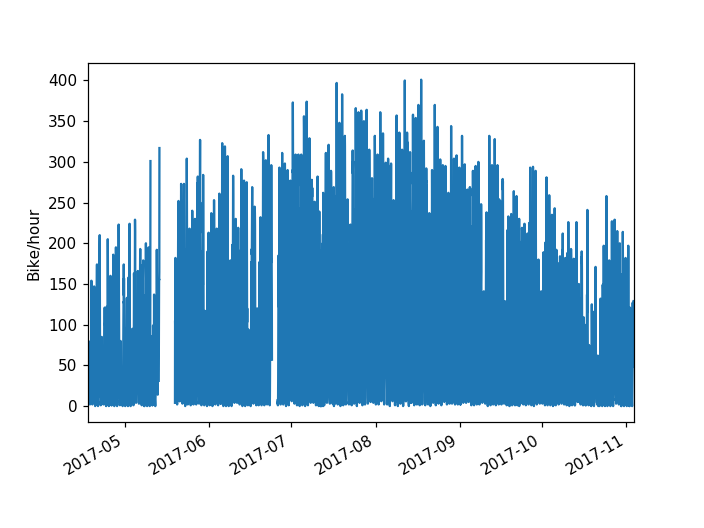

In [6]:
f,ax = plt.subplots()
ax = data.sum(1).plot(kind='line')
ax.set_ylabel('Bike/hour')
ax.set_xlabel('')
f.savefig('hourly_usage_may-sep.png')

<IPython.core.display.Javascript object>


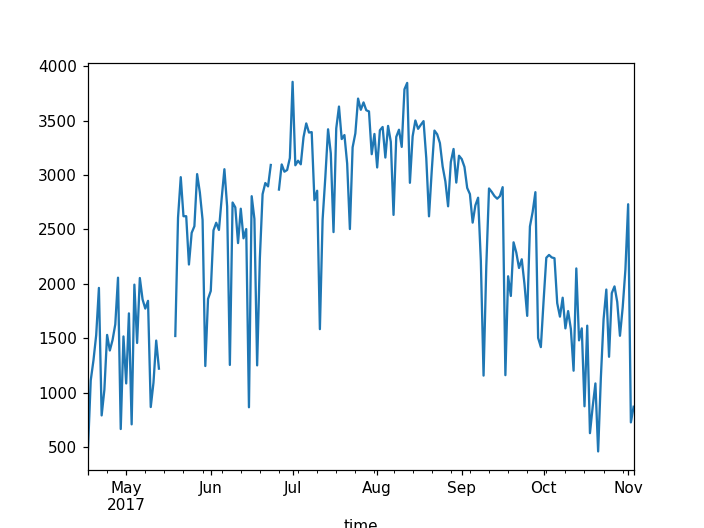

In [7]:
f,ax = plt.subplots()
data.groupby(pd.TimeGrouper(freq='D')).sum().sum(1).plot()


In [8]:
def plotweek(startdate,enddate):
    weekdata = data[startdate:enddate]
    f,ax = plt.subplots()
    ax = weekdata.sum(1).plot()
    ax.set_ylabel('Bike/hour')
    ax.set_xlabel('')
    f.savefig('weekdata-{}-{}.png'.format(startdate,enddate))
    return ax

<IPython.core.display.Javascript object>


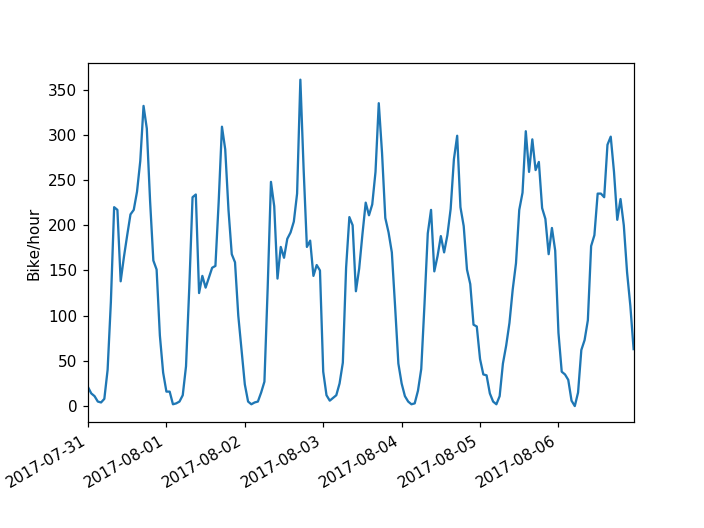

In [9]:
plotweek('2017-07-31','2017-08-06')

<IPython.core.display.Javascript object>


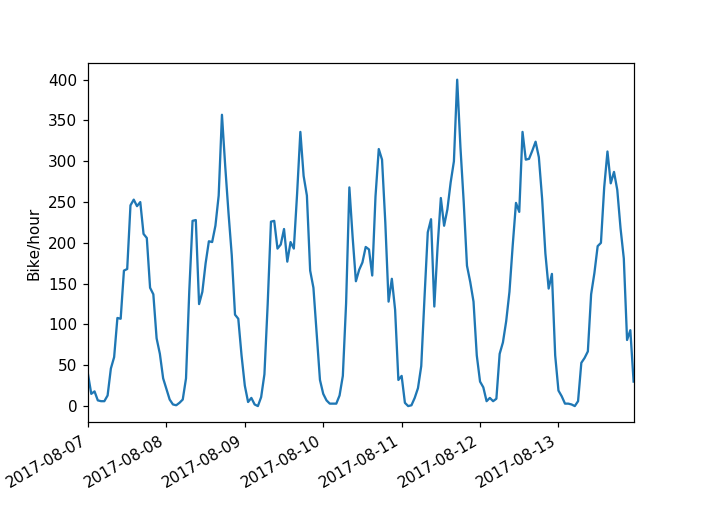

In [10]:
plotweek('2017-08-07','2017-08-13')

# Transform data

In [11]:
pivoted = pd.DataFrame(data).pivot_table(
                           index=data.index.date,
                           columns=data.index.hour,
                           fill_value=0)

In [12]:
pivoted.head()

0                                  ...                             \
time       0  1  2  3  4  5   6   7    8    9  ...   14   15     16   17   18   
2017-04-17  0  0  0  0  0  0   0   0    0    0 ...   66   58   47.0   59   44   
2017-04-18  6  4  6  4  2  4  17  41   51   80 ...   57   58  106.0  154   71   
2017-04-19  9  5  2  3  4  4  15  76  117  112 ...   68   45   98.0  147  129   
2017-04-20  7  1  0  1  1  4  19  51  127   98 ...   97  105  136.0  169  174   
2017-04-21  8  6  3  0  2  9  17  61  123  107 ...  126  130  175.0  199  210   

                                 
time         19  20  21  22  23  
2017-04-17   19  20  23   8   8  
2017-04-18   99  43  50  18  19  
2017-04-19   74  70  73  32  13  
2017-04-20   99  92  60  33  20  
2017-04-21  152  90  66  49  34  

[5 rows x 24 columns]

Extract raw values into a numpy 2d array

In [14]:
X = pivoted.values
print(X.sum())
X.shape

464168.5


(201, 24)

# Visualize the data

In [15]:
%matplotlib notebook

In [16]:
from sklearn.decomposition import PCA
Xpca = PCA(0.9).fit_transform(X)
Xpca.shape

(201, 3)

In [17]:
dates = list(pivoted.index.values)
dates = np.array([x.strftime("%m %d") for x in dates])
dates.shape

(201,)

<IPython.core.display.Javascript object>


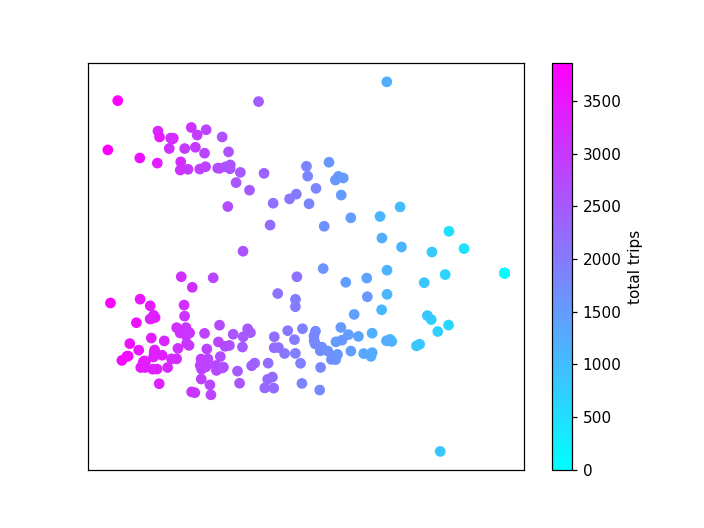

In [18]:
total_trips = X.sum(1)
f,ax = plt.subplots()
scat = ax.scatter(Xpca[:, 0], Xpca[:, 1], c=total_trips, cmap='cool',picker=0.5)
ax.get_xaxis().set_ticks([])
ax.get_yaxis().set_ticks([])
f.colorbar(scat,label='total trips');
f.savefig('PCA_numtrips.png')

<IPython.core.display.Javascript object>


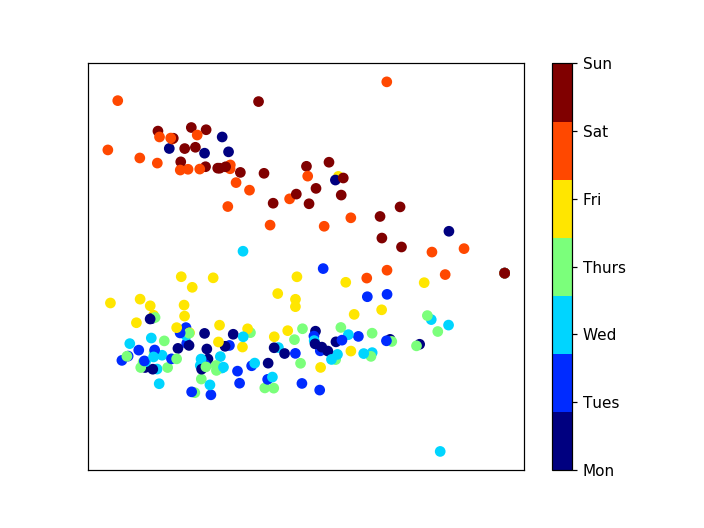

In [19]:
f2,ax2 = plt.subplots()

dayofweek = pd.to_datetime(pivoted.index).dayofweek
scat2 = ax2.scatter(Xpca[:, 0], Xpca[:, 1], c=dayofweek,
            cmap=plt.cm.get_cmap('jet', 7))
cb = f2.colorbar(scat2,ticks=range(7))
ax2.get_xaxis().set_ticks([])
ax2.get_yaxis().set_ticks([])
cb.set_ticklabels(['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun'])
#f2.clim(-0.5, 6.5);
f2.savefig('PCA_dayofweek.png')

<IPython.core.display.Javascript object>


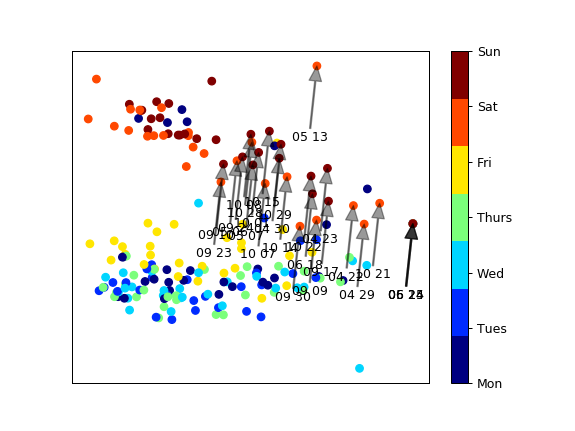

In [26]:
f2,ax2 = plt.subplots()

dayofweek = pd.to_datetime(pivoted.index).dayofweek
scat2 = ax2.scatter(Xpca[:, 0], Xpca[:, 1], c=dayofweek,
            cmap=plt.cm.get_cmap('jet', 7))
cb = f2.colorbar(scat2,ticks=range(7))
ax2.get_xaxis().set_ticks([])
ax2.get_yaxis().set_ticks([])
cb.set_ticklabels(['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun'])
#f2.clim(-0.5, 6.5);

for date,x,y,dow in zip(dates,Xpca[:,0],Xpca[:,1],dayofweek):
    if dow > 4 and x>15:
        ax2.annotate(date,(x,y),xytext=(-20,-60),textcoords='offset points',arrowprops=dict(facecolor='black', headwidth=10, alpha=0.4, width=1))
f2.savefig('PCA_dayofweek_lowvolweekends.png')

<IPython.core.display.Javascript object>


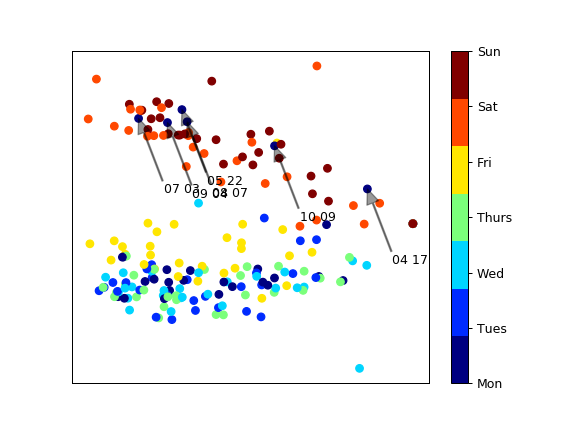

In [27]:
f2,ax2 = plt.subplots()

dayofweek = pd.to_datetime(pivoted.index).dayofweek
scat2 = ax2.scatter(Xpca[:, 0], Xpca[:, 1], c=dayofweek,
            cmap=plt.cm.get_cmap('jet', 7))
cb = f2.colorbar(scat2,ticks=range(7))
ax2.get_xaxis().set_ticks([])
ax2.get_yaxis().set_ticks([])
cb.set_ticklabels(['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun'])
#f2.clim(-0.5, 6.5);

for date,x,y,dow in zip(dates,Xpca[:,0],Xpca[:,1],dayofweek):
    if dow == 0 and y>20:
        ax2.annotate(date,(x,y),xytext=(20,-60),textcoords='offset points',arrowprops=dict(facecolor='black', headwidth=10, alpha=0.4, width=1))
f2.savefig('PCA_dayofweek_mondays.png')        

In [28]:
month = list(pivoted.index.values)
month = np.array([int(x.strftime("%m")) for x in month])
month;

<IPython.core.display.Javascript object>


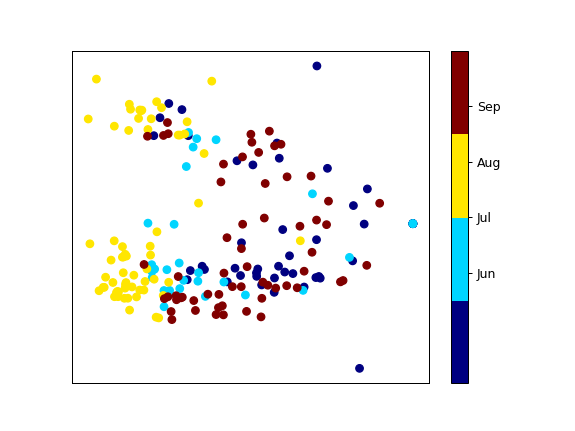

In [29]:
f2,ax2 = plt.subplots()

dayofweek = pd.to_datetime(pivoted.index).dayofweek
scat2 = ax2.scatter(Xpca[:, 0], Xpca[:, 1], c=month,
            cmap=plt.cm.get_cmap('jet', 4))
cb = f2.colorbar(scat2,ticks=range(6,10))
ax2.get_xaxis().set_ticks([])
ax2.get_yaxis().set_ticks([])
cb.set_ticklabels(['Jun', 'Jul', 'Aug', 'Sep',''])
#f2.clim(-0.5, 6.5);


In [30]:
dayofweek.shape

(197,)

In [31]:
pivoted.index[-1]

datetime.date(2017, 10, 30)

In [32]:
pd.to_datetime(pivoted.index[-1]).dayofweek

0

# Unsupervised Clustering

<IPython.core.display.Javascript object>


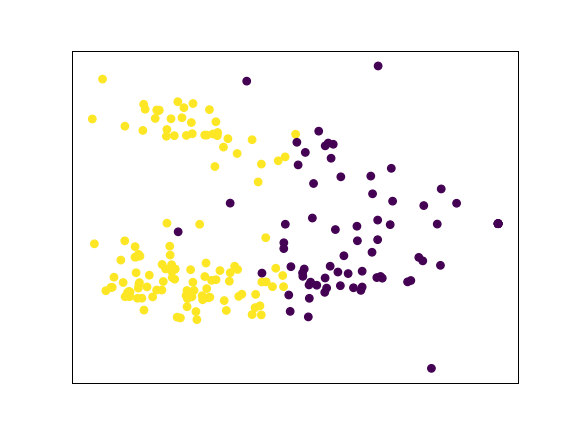

In [34]:
f3,ax3 = plt.subplots()

# Updates GaussianMixture from JVP's blog
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=2)
gmm.fit(Xpca)
cluster_label = gmm.predict(Xpca)
ax3.get_xaxis().set_ticks([])
ax3.get_yaxis().set_ticks([])
ax3.scatter(Xpca[:,0], Xpca[:,1],c=cluster_label)
f3.savefig('PCA_clustering.png')

# To Do: Linear Discriminant Analysis